## Understanding Markov Processes

### Markov Processes:
A Markov process (often referring specifically to a Markov chain when talking about discrete-time processes) is a mathematical model that undergoes transitions from one state to another within a finite or countable number of possible states. The key property of a Markov process is that the probability of transitioning to any particular state is dependent solely on the current state and time elapsed, and not on the sequence of states that preceded it.

Properties:

- Memorylessness: The future state only depends on the current state and not the sequence of states that led to the current state.
- Transition Probabilities: In a discrete-time Markov chain, these probabilities can be represented using a matrix, where the entry at row *i* and column *j* represents the probability of transitioning from state *i* to state *j*.

### The problem:
We want to study the movement of a customer over a period of time among the different restaurants of a famous chain in town. We will use Markov processes to model the custumer's behavior.

Consider there are 3 restaurants in the town part of the chain: Burger Joint, Pizza Place, and Sushi Bar. Over time, based on the preferences and options, a customer might decide to switch restaurants or stay at the current one.

In [84]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the Markov Process:
- Initially, assume equal probability to start from any restaurant.
- Consider the following probabilities to change restaurants:
        
        - From Burger Joint to Pizza Place: 20%
        - From Burger Joint to Sushi Bar: 20%
        - From Pizza Place to Burger Joint: 10%
        - From Pizza Place to Sushi Bar: 20%
        - From Sushi Bar to Burger Joint: 20%
        - From Sushi Bar to Pizza Place: 30%


In [85]:
# State space
restaurants = ["Burger Joint", "Pizza Place", "Sushi Bar"]

# Initial probabilities for states
# assuming an equal chance to start from any restaurant.
p = 1 / len(restaurants)
initial_probabilities = [p for _ in range(len(restaurants))]

# Transition matrix
# Rows: current state, Columns: next state
transition_matrix = [
    [(1 - 0.4), 0.2, 0.2],
    [0.1, (1 - 0.3), 0.2],
    [0.2, 0.3, (1 - 0.5)],
]

### Simulating the Markov Process:

In [86]:
def simulate_restaurant_visits(days, initial_probabilities, transition_matrix):
    current_restaurant = np.random.choice(restaurants, p=initial_probabilities)
    visit_sequence = [current_restaurant]

    for day in range(days - 1):
        for i, restaurant in enumerate(restaurants):
            if current_restaurant == restaurant:
                p = transition_matrix[i]
                next_restaurant = np.random.choice(restaurants, p=p)

        visit_sequence.append(next_restaurant)
        current_restaurant = next_restaurant

    return visit_sequence

# Simulating restaurant visits for 15 days
days = 15
visit_sequence = simulate_restaurant_visits(days, initial_probabilities, transition_matrix)
# print(visit_sequence)

### Visualize the Markov Process:

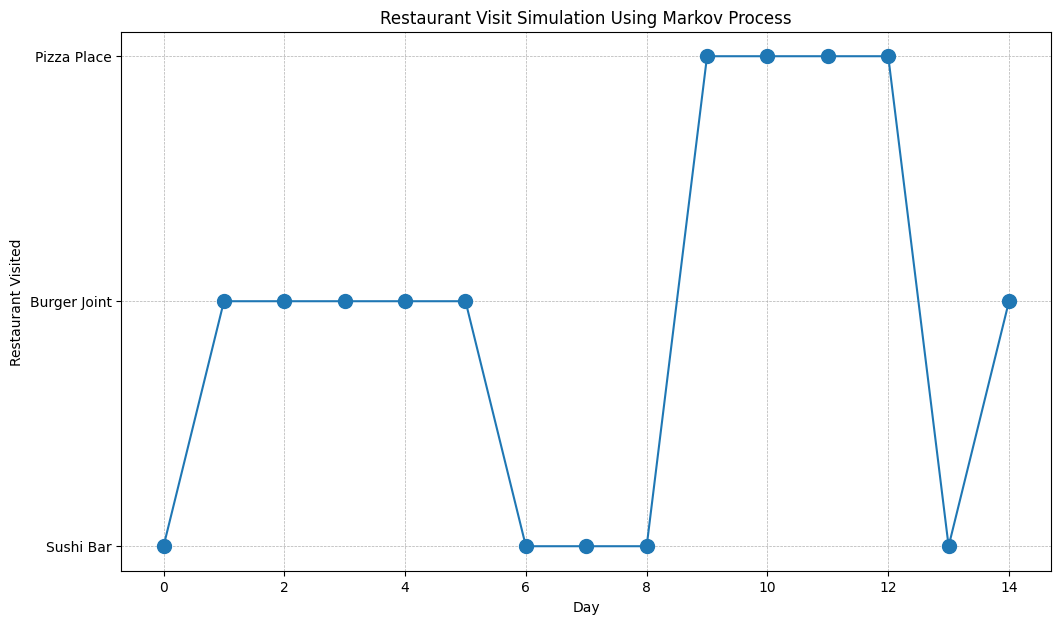

In [87]:
def plot_restaurant_simulation(visit_sequence):
    days = len(visit_sequence)
    day_numbers = list(range(days))
    
    plt.figure(figsize=(12, 7))
    plt.plot(day_numbers, visit_sequence, '-o', markersize=10)
    plt.yticks(restaurants)
    plt.xlabel('Day')
    plt.ylabel('Restaurant Visited')
    plt.title('Restaurant Visit Simulation Using Markov Process')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

plot_restaurant_simulation(visit_sequence)

### Question:

Modify the values of the transition matrix to study how different probabilities influence the custumer's choices. Comment about your observations.

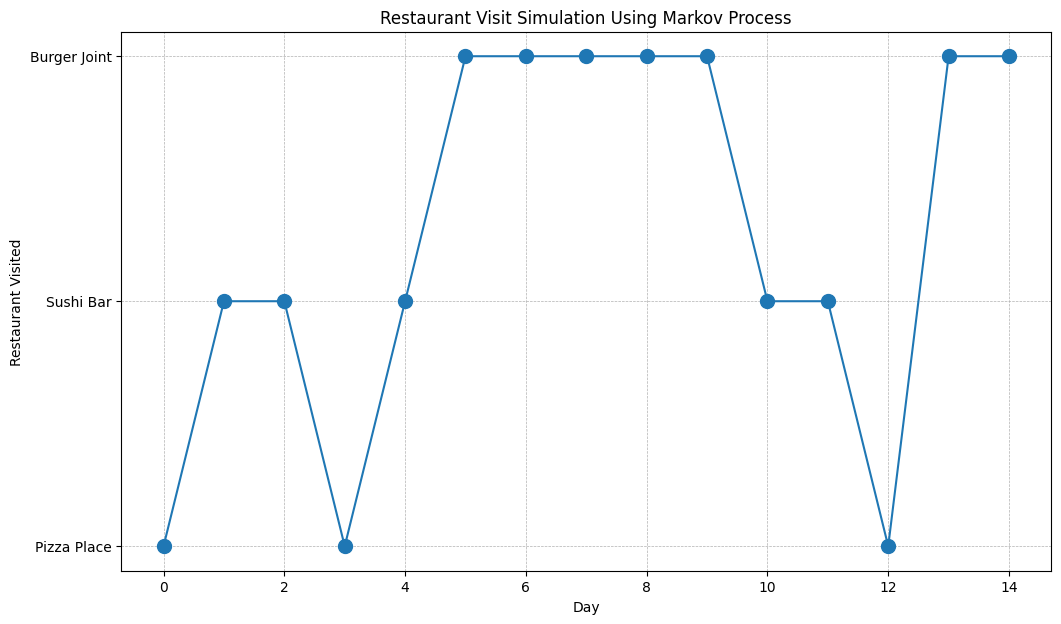

In [88]:
transition_matrix = [
    [(1 - 0.1), 0.05, 0.05],
    [0.3, (1 - 0.5), 0.2],
    [0.2, 0.3, (1 - 0.5)],
]
visit_sequence = simulate_restaurant_visits(days, initial_probabilities, transition_matrix)
plot_restaurant_simulation(visit_sequence)


We can increase the probability of staying in the same restaurant if we want like here with 'Burger joint' or favor changing to other restaurants.